# Example Plots
This notebook illustrates the different types of graph you can produce with Hydrofunctions.
We have:

* hydrograph
* flow duration
* cycleplot
* histogram

We'll start with the usual imports:

In [1]:
import hydrofunctions as hf
import pandas as pd
%matplotlib inline
hf.__version__
pd.__version__

'0.24.2'

We're going to use two datasets in the following examples. The first dataset was collected at two sites along the Shenandoah River.

In [2]:
sites = ['01634000', '01632000']  # the first is downstream of the second.
start = '2008-01-01'
end = '2018-01-01'
service = 'dv'
# Request our data.
request = hf.NWIS(sites, service, start, end, file='graphing-1.parquet')
request # Verify that the data request went fine.

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=01634000%2C01632000&startDT=2008-01-01&endDT=2018-01-01
Saving data to graphing-1.parquet


c:\users\marty\google drive\pydev\src\hydrofunctions\hydrofunctions\hydrofunctions.py:526: HydroUserWarning: One or more datasets in this request is going to be 'upsampled' to 1 days 00:00:00 because the data were collected at a lower frequency of 2 days 00:00:00
  exceptions.HydroUserWarning)


USGS:01632000: N F SHENANDOAH RIVER AT COOTES STORE, VA
    00010: <Day>  Temperature, water, degrees Celsius
    00060: <Day>  Discharge, cubic feet per second
    00095: <Day>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius
USGS:01634000: N F SHENANDOAH RIVER NEAR STRASBURG, VA
    00060: <Day>  Discharge, cubic feet per second
    00095: <2 * Days>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius
    00400: <Day>  pH, water, unfiltered, field, standard units
    63680: <Day>  Turbidity, water, unfiltered, monochrome near infra-red LED light, 780-900 nm, detection angle 90 +-2.5 degrees, formazin nephelometric units (FNU)
Start: 2008-01-01 00:00:00+00:00
End:   2018-01-01 00:00:00+00:00

This second dataset is for two years of data collected every five minutes, with five different parameters collected.
This request may take a while the first time!  After that, Hydrofunctions will automatically access the data from the parquet file.

In [3]:
site = '01581752'
request2 = hf.NWIS(site, 'iv', '2016-01-01', '2018-12-31', file='graphing-2.parquet')
request2

Requested data from https://nwis.waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=01581752&startDT=2016-01-01&endDT=2018-12-31
Saving data to graphing-2.parquet


USGS:01581752: PLUMTREE RUN NEAR BEL AIR, MD
    00010: <5 * Minutes>  Temperature, water, degrees Celsius
    00060: <5 * Minutes>  Discharge, cubic feet per second
    00065: <5 * Minutes>  Gage height, feet
    00095: <5 * Minutes>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius
    63680: <5 * Minutes>  Turbidity, water, unfiltered, monochrome near infra-red LED light, 780-900 nm, detection angle 90 +-2.5 degrees, formazin nephelometric units (FNU)
Start: 2016-01-01 05:00:00+00:00
End:   2019-01-01 04:55:00+00:00

Create two nice clean dataframes that we'll plot with.

In [6]:
Q = request.df('q') # Q stands for discharge
T = request2.df('00010') # T stands for water temperature.

Rename the columns to something easier to remember.

In [7]:
Q = Q.rename(columns={"USGS:01632000:00060:00003": "Upstream", "USGS:01634000:00060:00003": "Downstream"})
Q.head(2)

,Upstream,Downstream
datetimeUTC,,
2008-01-01 00:00:00+00:00,112.0,330.0
2008-01-02 00:00:00+00:00,109.0,320.0


In [8]:
T = T.rename(columns={"USGS:01581752:00010:00000": "Plumtree"})
T.head(2)

,Plumtree
datetimeUTC,
2016-01-01 05:00:00+00:00,8.7
2016-01-01 05:05:00+00:00,8.7


# Plotting a Hydrograph
Hydrographs can be produced simply by using the built-in .plot() method of our dataframe.

C:\Users\Marty\Anaconda3\envs\py37hfdev\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


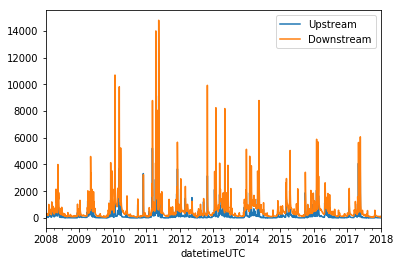

In [9]:
Q.plot()

# Plotting a Flow Duration Chart
Flow duration charts are function included in Hydrofunctions.
We'll use the 'linear' option to scale the X axis.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2140c9c7828>)

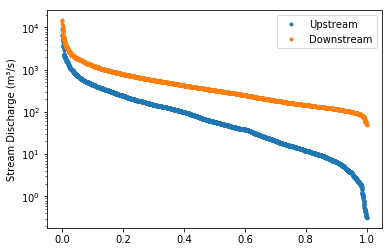

In [10]:
hf.flow_duration(Q, xscale='linear')

Now let's plot the same data using the default 'logit' scale

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2140caea2e8>)

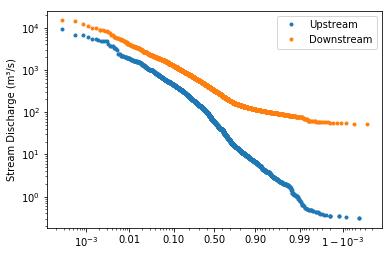

In [11]:
hf.flow_duration(Q, xscale='logit')

## Plotting a Cycleplot Chart
The cycleplot helps to illustrate various natural cycles in your dataset. It plots a single column of data so that the data value is on the Y axis, and time is on the X axis. The time axis is set to show either an annual cycle (shown below), a weekly cycle, or a diurnal cycle (default).

In our example below, the ten years of daily data are plotted over the course of a year, and all of the values within a week are averaged and plotted by week number. The median and mean for each week are shown with lines, while the 20th, 40th, 60th, and 80th percentile are shown with shaded fills.

For our dataset, you can see the lower flows that start occuring around week 25 (early June) and last through the summer to week 45 (start of November). You can also bin values by day ('annual-day') or by month ('annual-month'). The smaller the bins, the greater the variation.

(<Figure size 1008x432 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002140D344CF8>],
       dtype=object))

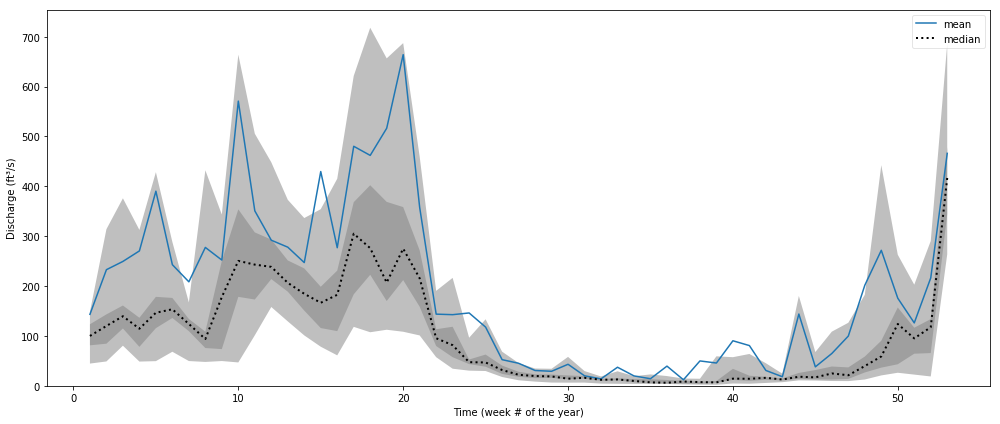

In [12]:
hf.cycleplot(Q.loc[:,'Upstream'], 'annual-week')

In this chart, we plot the hourly temperature for each month of the year. Note that the times are UTC, so midnight for this site should occur at hour 6.

(<Figure size 1008x432 with 12 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002140D5D0978>,
       dtype=object))

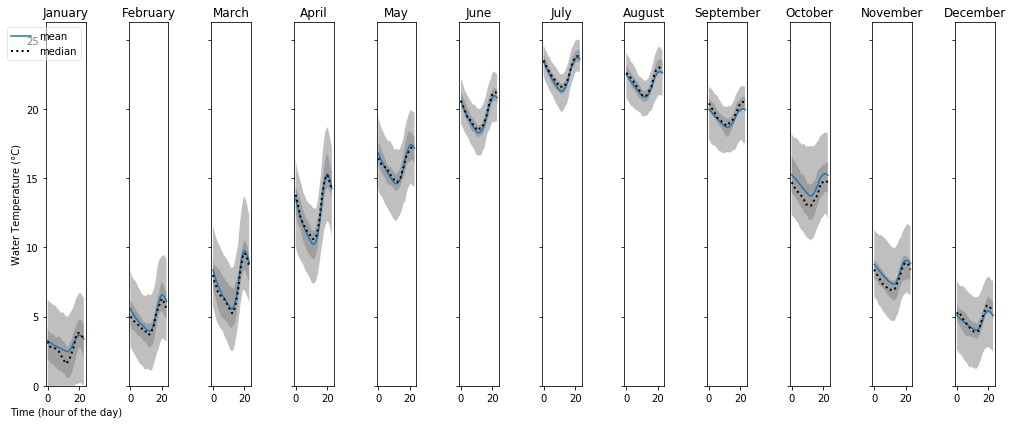

In [13]:
hf.cycleplot(T, 'diurnal', compare='month', y_label="Water Temperature (°C)")

## Plotting a histogram
Dataframes have a built-in histogram function.

We'll plot each histogram with 20 bins (default is 10;)
and we will have both sites share the same scale for the x axis (discharge) and y axis (count)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002140DCC3080>,
      dtype=object)

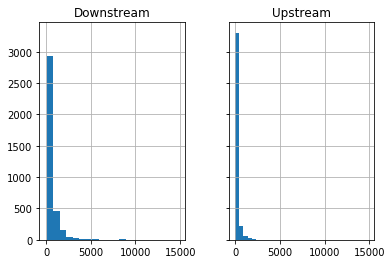

In [14]:
Q.hist(bins=20, sharex=True, sharey=True)

## Box plots
Box plots are a great way to illustrate a distribution. In this chart, we'll use boxplots to compare the two sites along the Shenandoah River:

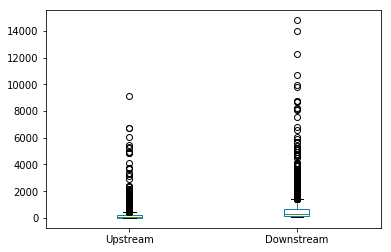

In [15]:
Q.plot.box()